In [223]:
import numpy as np
import dynesty
from dynesty import utils as dyfunc
from dynesty import plotting as dyplot
import scipy
import matplotlib.pyplot as plt

In [274]:
import numpy as np

# Define the dimensionality of our problem.
ndim = 4 # microlens mass for two images, velocity of the supernova in two filters

def loglike(x):
    """
    The log-likelihood function.
    """

    return -np.dot(x - [0.5, 0.3, 0.9, 0.8], x - [0.5,0.3, 0.9, 0.8]) # fiducial -chi2 likelihood

# Define our priors
def ptform(u):
    """
    Transforms samples `u` drawn from the unit cube to samples to those
    from our priors for each variable.
    """

    x = np.array(u)  # copy u

    # mass is lognormal distributed
    x[0] = scipy.stats.lognorm.ppf(u[0], 1, scale=0.3)
    # mass is lognormal distributed
    x[1] = scipy.stats.lognorm.ppf(u[1], 1, scale=0.3)
    # velocity is normal distributed
    x[2] = scipy.stats.norm.ppf(u[2], loc=1, scale=2)
    # velocity is normal distributed
    x[3] = scipy.stats.norm.ppf(u[3], loc=1, scale=2)
    
    return x

In [275]:
# "Static" nested sampling.
sampler = dynesty.NestedSampler(loglike, ptform, ndim)
sampler.run_nested()
sresults = sampler.results

# "Dynamic" nested sampling.
dsampler = dynesty.DynamicNestedSampler(loglike, ptform, ndim)
dsampler.run_nested()
dresults = dsampler.results

1634it [00:02, 717.62it/s, +500 | bound: 0 | nc: 1 | ncall: 14060 | eff(%): 15.737 | loglstar:   -inf < -0.008 <    inf | logz: -2.464 +/-  0.053 | dlogz:  0.001 >  0.509]
13040it [00:12, 1033.46it/s, batch: 8 | bound: 0 | nc: 1 | ncall: 66466 | eff(%): 19.619 | loglstar:   -inf < -0.032 < -0.682 | logz: -2.498 +/-  0.034 | stop:  0.946]         


In [276]:
# Combine results from "Static" and "Dynamic" runs.
results = dyfunc.merge_runs([sresults, dresults])

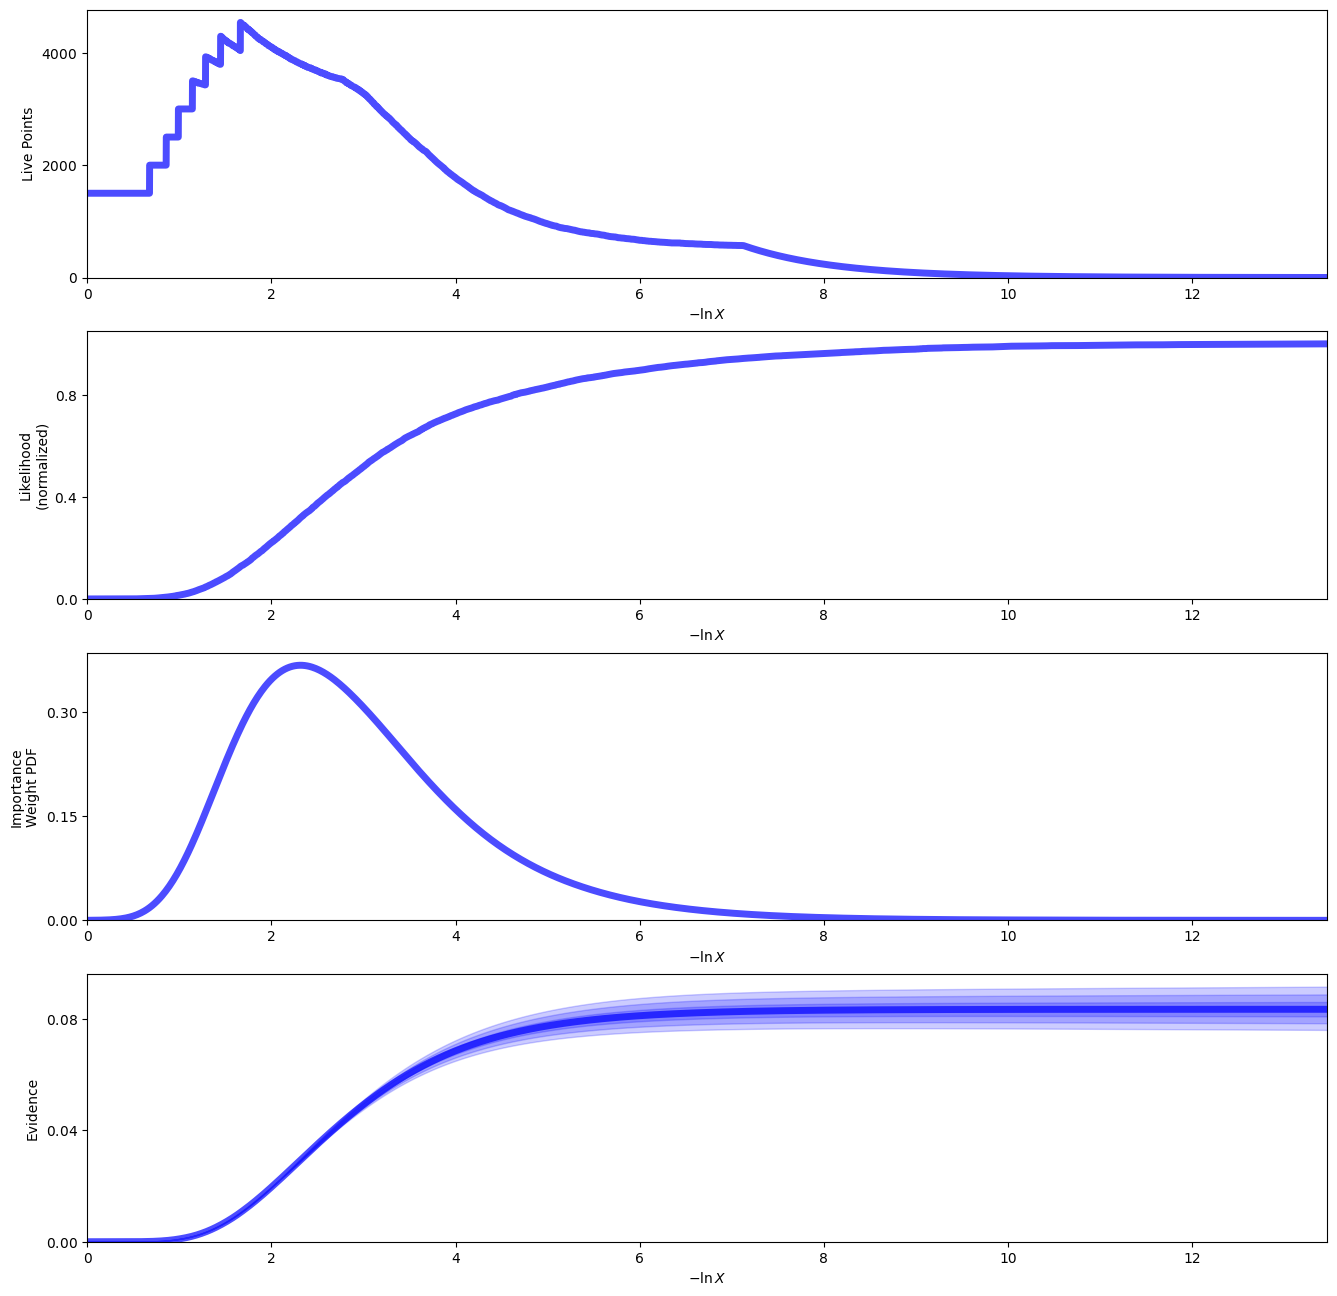

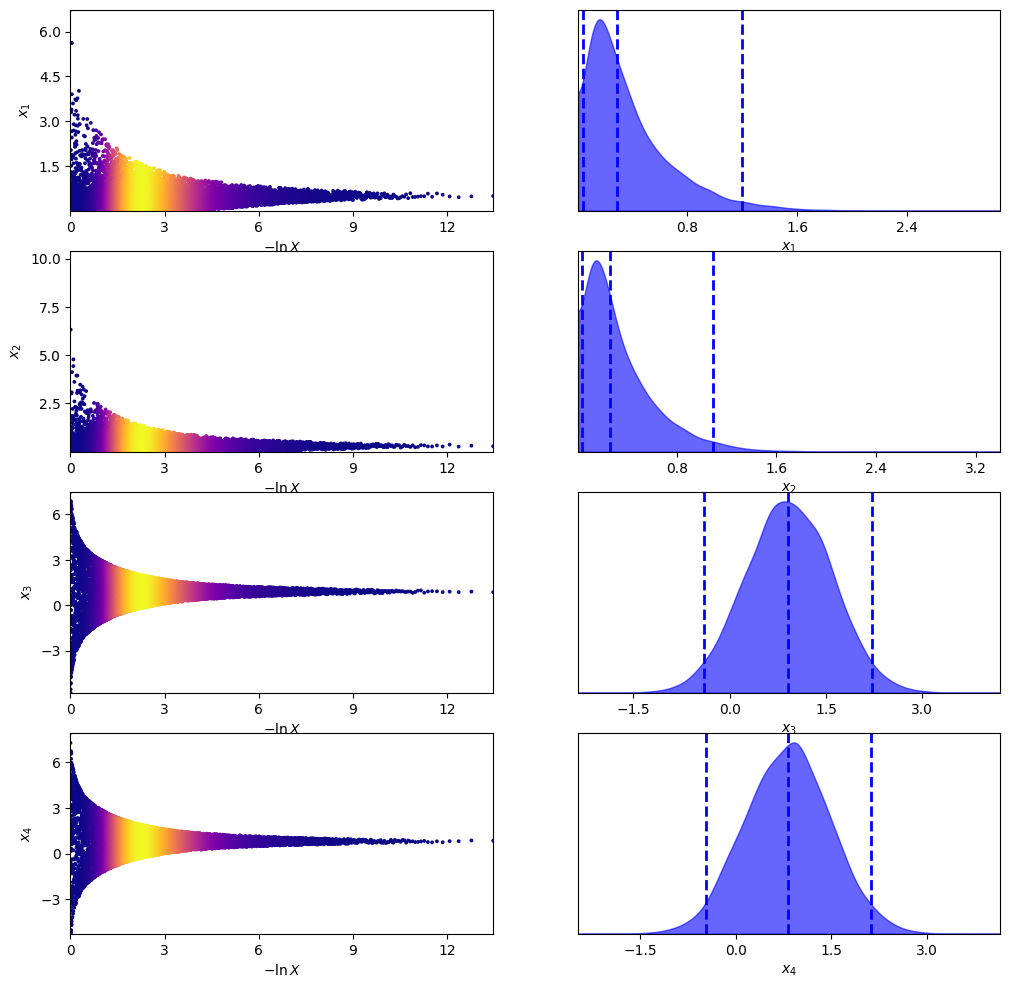

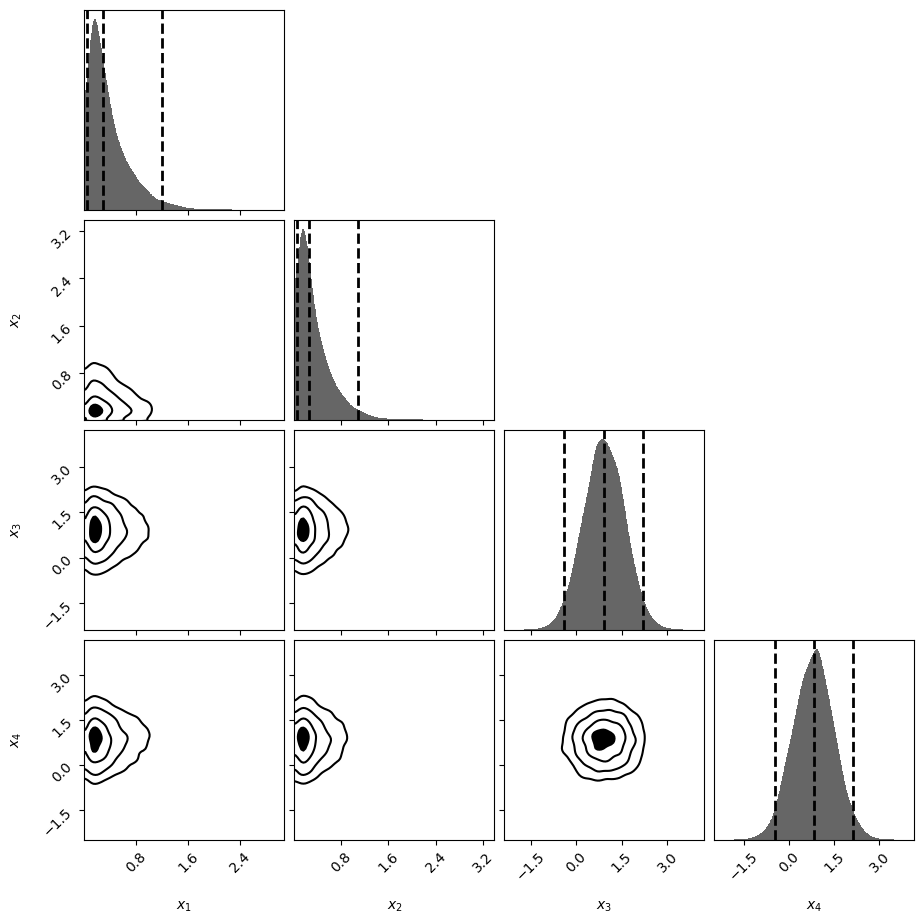

In [277]:
# Plot a summary of the run.
rfig, raxes = dyplot.runplot(results)

# Plot traces and 1-D marginalized posteriors.
tfig, taxes = dyplot.traceplot(results)

# Plot the 2-D marginalized posteriors.
cfig, caxes = dyplot.cornerplot(results)

In [278]:
from dynesty import utils as dyfunc

# Extract sampling results.
samples = results.samples  # samples
weights = results.importance_weights()

# Compute 10%-90% quantiles.
quantiles = [dyfunc.quantile(samps, [0.1, 0.9], weights=weights)
             for samps in samples.T]

# Compute weighted mean and covariance.
mean, cov = dyfunc.mean_and_cov(samples, weights)
print(mean)

# Resample weighted samples.
samples_equal = results.samples_equal()

# Generate a new set of results with sampling uncertainties.
results_sim = dyfunc.resample_run(results)

[0.37630681 0.34606395 0.91530795 0.81607596]
